In [1]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tueplots import bundles, figsizes

In [2]:
x = np.array([2_500,5_000,10_000,15_000,20_000,25_000,30_000,35_000,60_000,110_000,160_000,210_000,260_000,310_000,360_000,410_000,460_000,510_000,560_000,610_000,660_000,710_000,760_000,810_000,860_000,910_000,960_000,1_010_000, 1_060_000, 1_100_000])

won_weak = np.array([13,16,35,34,78,89,94,95, 94,95,  99,85,98, 98,98,99, 95,96,98, 98,93,98,  99,97,96,  96,99,99,96,98])
draw_weak = np.array([24,12,19,64,21,11,5,4, 4,5,   1,14,2,   2,0,1,    3,4,1,    2,5,2,     1,0,4,     1,1,1,3,1])
defeat_weak = np.array([63,72,46,2,1,0,1,1,2,0, 0,1,0,    0,2,0,    2,0,1,    0,2,0,     0,3,0,     3,0,0,1,1])
print('Weak is ok: {}'.format(((won_weak+draw_weak+defeat_weak)==100).all()))
win_rate_weak = (won_weak + 0.5 * draw_weak) / 100

# win_rate_strong = win_rate_weak
won_strong = np.array([21,24,48,38, 76,93 ,95,94,       95,100,97, 93,99, 97,97,100, 97,95,95, 99,97,99,99,99,100,98,99,100,99,97])
draw_strong = np.array([33,12,29,58, 24,7, 4,2,         3,0,3,     7,1,3,2,0,     1,5,3,    0,3,1,0,1,     0,2,1,    0,1,2])
defeat_strong = np.array([46,64,23,4, 0,0,  1,4,        2,0,0,0,     0,0,1,0,     2,0,2,    1,0,0,1,0,     0,0,0,    0,0,1])
print('Strong is ok: {}'.format(((won_strong+draw_strong+defeat_strong)==100).all()))
print(won_strong+draw_strong+defeat_strong)
win_rate_strong = (won_strong + 0.5 * draw_strong) / 100

df = pd.DataFrame({'Step':x,'Weak':win_rate_weak,'Strong':win_rate_strong})

Weak is ok: True
Strong is ok: True
[100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100]


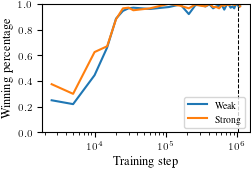

<Figure size 275x193.959 with 0 Axes>

In [3]:
Y_OFFSET = 0.3
plt.rcParams.update(bundles.iclr2023())
figsize = figsizes.iclr2023(rel_width=0.5, nrows=1, ncols=1, tight_layout=True)
figsize["figure.figsize"] = (
    figsize["figure.figsize"][0],
    figsize["figure.figsize"][1] + 0.8 * Y_OFFSET,
)
plt.rcParams.update(figsize)

def plot() -> None:
    fig, axes = plt.subplots(nrows=1, ncols=1)

    df.plot(x="Step", y=["Weak", "Strong"], ax=axes)
    axes.set_xlabel("Training step")
    axes.set_ylabel("Winning percentage")
    axes.set_ylim(0.0, 1.0)
    axes.legend(loc="lower right")
    axes.set_xscale('log')

    plt.tight_layout()
    plt.vlines([1_025_000], 0, 1, linestyle='dashed', colors='black', linewidth=0.75)
    plt.subplots_adjust(hspace=fig.subplotpars.hspace + Y_OFFSET)
    plt.savefig("muzero_results.pdf")
    plt.show()
    plt.clf()

def main() -> None:
    plot()

if __name__ == "__main__":
    main()